## Selenium

- 웹 브라우저를 원격으로 조작하는 도구
- 자동으로 URL을 열고 클릭 등의 행동이 가능
- 스크롤, 문자의 입력, 화면 캡처 등

### selenium을 사용하는 이유

Beautiful soup 으로 해결할 수 없는 상황
- 접근할 웹 주소를 알 수 없을 때
- 자바 스크립트를 사용하는 웹페이지
- 웹 브라우저로 접근하면 안되는 상황일때

### selenium 기초

In [3]:
from selenium import webdriver

In [5]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://www.naver.com')

In [24]:
# 브라우저 종료
driver.quit()

In [18]:
# 화면 최대 크기 설정
driver.maximize_window()
# 화면 최소 크기 설정
driver.minimize_window()

In [ ]:
# 화면 새로고침
driver.refresh()
# 뒤로 가기
driver.back()
# 앞으로 가기
driver.forward() 

In [19]:
# 클릭
from selenium.webdriver.common.by import By

first_content = driver.find_element(By.CSS_SELECTOR, '#feed > div.feed_area > div > ul > li:nth-child(2)')
first_content.click()

In [20]:
# 새로운 탭 생성
driver.execute_script("window.open('http://www.naver.com')")

In [22]:
# 탭 이동
driver.switch_to_window(driver.window_handles[0])

<ipython-input-22-8f353f6bc755>:2: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[0])


In [23]:
# 현재 탭 닫기
driver.close()

### 화면 스크롤

In [27]:
# 스크롤 가능한 높이
# 자바 스크립트 코드
driver.execute_script('return document.body.scrollHeight')

2973

In [29]:
# 화면 스크롤 하단으로 이동
driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')

In [30]:
# 현재 화면 스크린샷
driver.save_screenshot('D:/screen/last_height.png')

True

In [31]:
# 화면 스크롤 상단으로 이동
driver.execute_script('window.scrollTo(0,0)')

In [37]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#feed > div.ContentHeaderView-module__content_header___nSgPg')
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

In [38]:
# 화면 종료
driver.quit()

### 검색어 입력

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [4]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://www.naver.com')

#### CSS_SELECTOR

In [42]:
keyword = driver.find_element(By.CSS_SELECTOR, '#query')
keyword.send_keys('공심채 볶음')

In [44]:
# 검색 버튼 클릭
search_btn = driver.find_element(By.CSS_SELECTOR, '#search-btn')
search_btn.click()

#### XPATH

In [45]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath')

In [46]:
driver.find_element(By.XPATH, '//*[@id="search-btn"]').click()

#### 버튼 클릭 후 검색 과정

'<html lang="ko" data-dark="false" class="fzoom"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2
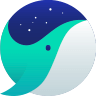
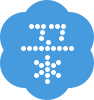

In [5]:
driver.page_source

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [6]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://pinkwink.kr')

In [7]:
# 돋보기 버튼 클릭
from selenium.webdriver import ActionChains

search_tag = driver.find_element(By.CSS_SELECTOR, '.search')
action = ActionChains(driver)
action.click(search_tag)
action.perform()

In [8]:
# 검색어 입력
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > input[type=text]').send_keys('딥러닝')

In [13]:
# 검색 버튼 클릭
driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > button').click()

### Selenium + BeautifulSoup

In [14]:
driver.page_source

'<html lang="ko"><head>\n                <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202306060101/reactive_library_fy2021.js"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=pinkwink.kr&amp;callback=_gfp_s_&amp;client=ca-pub-2982459700139266&amp;cookie=ID%3D54989e0c92a7a6cf-22a4bfe440e100f8%3AT%3D1686275744%3ART%3D1686277400%3AS%3DALNI_MakFzmTPYS69YJbLchfrq4C788agA&amp;gpic=UID%3D00000c45d7e11210%3AT%3D1686275744%3ART%3D1686277400%3AS%3DALNI_MbHHAkyNd-6cTNLfir0neDLMn5NJQ"></script><script src="https://t1.kakaocdn.net/malibu_prod/wpm.js" async=""></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202306060101/show_ads_impl_fy2021.js" id="google_shimpl"></script><script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest"

In [15]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')

In [16]:
soup.select('.post-item')

[<div class="post-item">
 <a href="/1423">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/b2u9XJ/btsgpYNip1p/4ArmaU8DKLL6EkhVlXMn2K/img.png"/>
 </span>
 <span class="title">핑크랩이 진행한 H Mobility 해커톤 대회 이야기</span>
 <span class="date">2023. 5. 18. 17:44</span>
 <span class="excerpt">작년 11월에 저희 핑크랩이 현대자동차의 H-Mobility 해커톤 대회를 진행하게 되었다고 하고, 첫 행사를 진행한 후 글을 올렸었습니다. 그리고 애초 계약했던 두 번째 행사를 지난 주 주말, 5월 13일 14일에 진행해서 이제 전체 진행을 마쳤습니다. 대회의 주제 자체는 지난번 글에서 다루어서 아래 글을 보시고, 오늘은 저와 저희 팀 - 핑크랩의 이야기를 해보려고 합니다. 해커톤을 어떻게 준비해 갔는지를 이야기를 해볼까 합니다. https://pinkwink.kr/1400 22년 11월 H-Mobility Robotics 해커톤 대회를 마쳤습니다 얼마전에 저희 핑크랩이 현대 H 모빌리티 로보틱스 해커톤 대회를 연다고 했었는데요. https://pinkwink.kr/1397 핑크랩이 H-Mobility..</span>
 </a>
 </div>,
 <div class="post-item">
 <a href="/1421">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/mRax9/btsc1u1UlQl/dgpqyFQtJ2f27FKr0SXu31/img.png"/>
 </span>
 <span class="title">[수강생 

In [18]:
contents = soup.select('.post-item')
len(contents)

8

In [19]:
contents[2]

<div class="post-item">
<a href="/1420">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/caNtI3/btr1UVcjBwM/AfYo8FZdds3KtvbaTzI8n1/img.png"/>
</span>
<span class="title">핑크랩이 carla, autoware, ROS2 관련 프로젝트를 시작합니다.</span>
<span class="date">2023. 3. 4. 17:38</span>
<span class="excerpt">저는 최근 긴기간 진행한 AI 로봇 기술관련 [해당회사에서는 로봇으로 제품을 출시하는 것이 아니어서^^] 프로젝트를 마치고 잠시 소강상태였다가 이번에 새롭게 짧은 기간으로 새로운 프로젝트를 진행합니다. carla는 자율주행 시스템용 시뮬레이터로 unreal 엔진 기반인데 요즘 관심있는 분들이 많으시죠. 이번 클라이언트는 무거운 이 도구들과 ROS2를 이용하여 원할한 시뮬레이션 환경을 회사내에 구축하고 싶어 합니다. 그래서 클라이언트와의 상담으로 저희 핑크랩은 인턴쉽을 핑크랩 내에서 진행하고 해당 인턴이 클라이언트가 원하는 산출물을 직접 개발하도록 유도하고 그 산출물과 함께 직원으로 해당 회사에 합류하도록 진행합니다. 매우 핑크랩과 어울리는 진행입니다.^^. CARLA는 처음부터 자율 주행 시스템의 개발,..</span>
</a>
</div>